In [1]:
import pandas as pd
import csv
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

In [2]:
parti_file = os.path.join(os.pardir, "data", "DS1_Intern_20170101.csv")
activity_file = os.path.join(os.pardir, "data", "hla_fitness-20170109.csv")

activity_outfile = os.path.join(os.pardir, "data", "activitymatrix.csv")
# eucdist_outfile = os.path.join(os.pardir, "data", "activity_eucdist.csv")

In [3]:
%%time
activity_df = pd.read_csv(activity_file)

Wall time: 24.5 s


In [4]:
#working activity df
wa_df = activity_df[['PID', 'ActivityDate','StepCount', 'Source']]
print(wa_df['Source'].unique())
wa_df.groupby(['Source'])['Source'].count().to_frame('activitycount')

['HPBWearable' 'HPBWearable_Apex' 'HealthKit' 'Actxa' 'SHealth' 'FitBit'
 'HPBWearable_Aibi' 'Lifelog' 'Shealth']


,activitycount
Source,
Actxa,91405
FitBit,709351
HPBWearable,5623269
HPBWearable_Aibi,202589
HPBWearable_Apex,1969446
HealthKit,1317256
Lifelog,57327
SHealth,1533691
Shealth,1


This is a count of activity reports submitted, not stepcount, or even days of activity.

In [5]:
parti_stepcount_df = wa_df.groupby(['PID']).sum().sort_values(by='StepCount')
len(parti_stepcount_df)
parti_stepcount_df

,StepCount
PID,
72ybcq62tplBHn4gUc82cQ==,0
/jd9UHnU5h3XHAyNTHGggA==,0
vp/m6KapEMwFcwhEMHskfw==,0
7Cz5fLS9DktMPRlF6c2XBg==,0
EIlPXf28oMjXQwKLpCeTyA==,0
BKn2y5WHfLVbcxn3V+mHLA==,0
4gUpqjtirFpu3Yj6BEmsnw==,0
3Q/hwRX97KNv0e8g5cx9Gg==,0
UCU5BQdfE397WELnGE6Qhg==,0


Only 242,146 participants in this dataset.



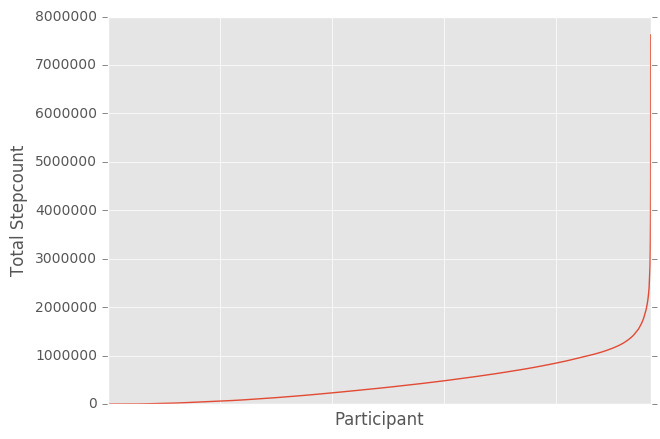

In [6]:
ax=parti_stepcount_df.plot(kind='line', figsize=(7,5), legend=None)
plt.xlabel("Participant")
plt.ylabel("Total Stepcount")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
plt.show()

Total stepcount by participant, have these few nutters who have huge stepcounts. How many?

In [7]:
parti_stepcount_df.describe()

,StepCount
count,2.421460e+05
mean,4.479114e+05
std,4.448569e+05
min,0.000000e+00
25%,8.697550e+04
50%,3.276660e+05
75%,6.901260e+05
max,7.620819e+06


The 75th percentile had a stepcount more than 10 times lower than the highest.

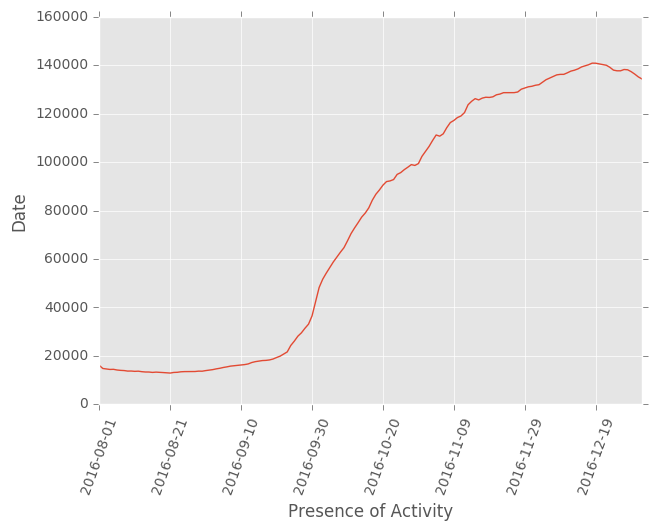

In [8]:
activity_count_df = wa_df.groupby(['ActivityDate'])['ActivityDate'].count().to_frame('ActivityDateCount')
activity_count_df.plot(kind='line', figsize=(7,5), legend=None)
plt.xlabel("Presence of Activity")
plt.ylabel("Date")
plt.xticks(rotation=70)
plt.show()

Reports of activity on a given date. Compare with stepcount on a given date, below.

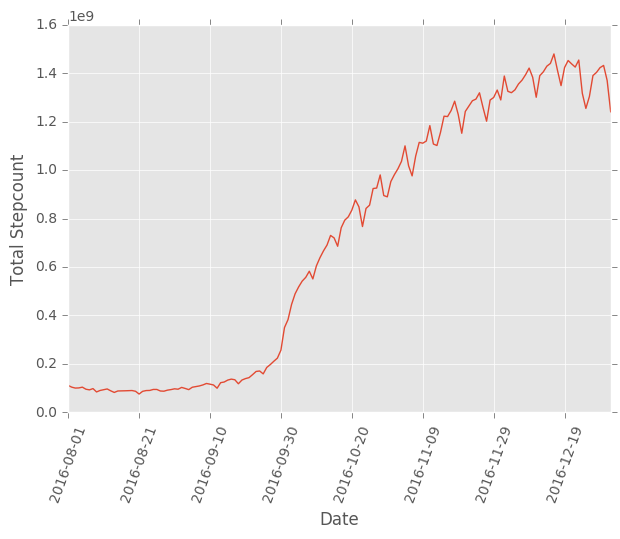

In [9]:
stepcount_total_df = wa_df.groupby(['ActivityDate'])['StepCount'].sum().to_frame('DateStepCount')
stepcount_total_df.plot(kind='line', figsize=(7,5), legend=None)
plt.xlabel("Date")
plt.ylabel("Total Stepcount")
plt.xticks(rotation=70)
plt.show()

In [10]:
activity_by_source = wa_df.groupby(['ActivityDate', 'Source'])['ActivityDate'].count().to_frame('ActivityCount')

activity_by_source_plot_df = activity_by_source.reset_index(level=['ActivityDate', 'Source'])
activity_by_source_plot_df

,ActivityDate,Source,ActivityCount
0,2016-08-01,Actxa,9
1,2016-08-01,FitBit,1007
2,2016-08-01,HPBWearable,11951
3,2016-08-01,HPBWearable_Apex,1
4,2016-08-01,HealthKit,1379
5,2016-08-01,Lifelog,1
6,2016-08-01,SHealth,1699
7,2016-08-02,Actxa,10
8,2016-08-02,FitBit,1028
9,2016-08-02,HPBWearable,10606


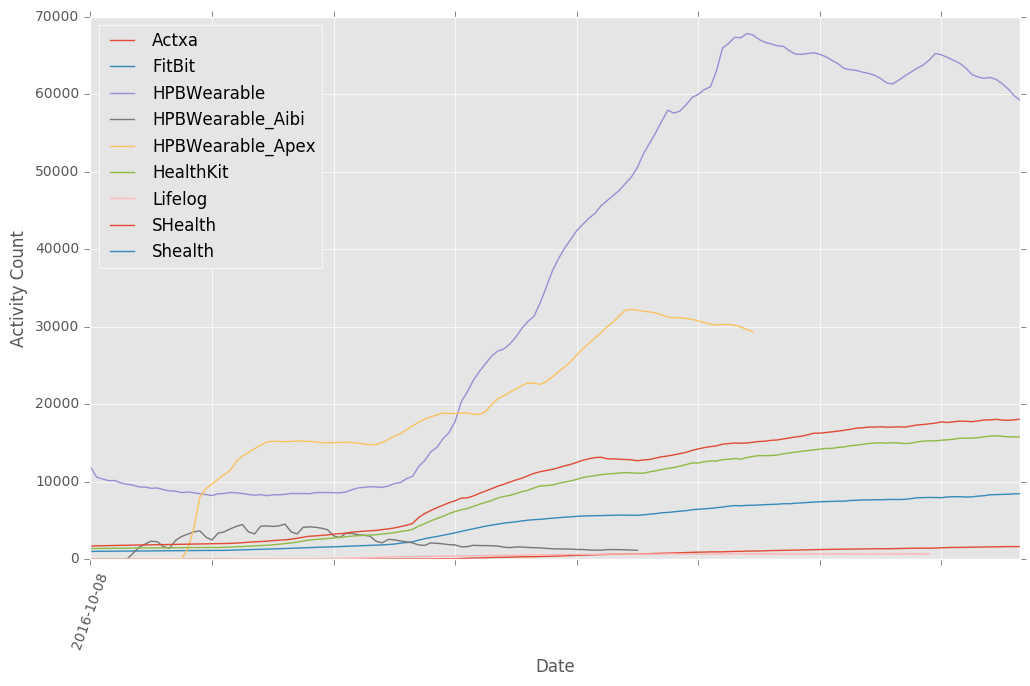

In [11]:
fig, ax = plt.subplots()
labels = []
for key, grp in activity_by_source_plot_df.groupby('Source'):
    ax = grp.plot(figsize=(12,7), ax=ax, kind='line', x='ActivityDate', y='ActivityCount')
    labels.append(key)
lines, _ = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.xlabel("Date")
plt.ylabel("Activity Count")
plt.xticks(rotation=70)
plt.show()

What we want to find is how the stepcount of each participant changes with the device they are using. 

Enough fiddling with summaries, time to start figuring out how to transform the data.

In [12]:
sampledf = wa_df.loc[wa_df['PID'] == 'y52/IZp7j0/TBTjveMIYXA==']
sampledf['datetime'] = pd.to_datetime(sampledf['ActivityDate'])
sampledf

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,PID,ActivityDate,StepCount,Source,datetime
0,y52/IZp7j0/TBTjveMIYXA==,2016-08-01,10276,HPBWearable,2016-08-01
1,y52/IZp7j0/TBTjveMIYXA==,2016-08-02,13449,HPBWearable,2016-08-02
2,y52/IZp7j0/TBTjveMIYXA==,2016-08-03,11209,HPBWearable,2016-08-03
3,y52/IZp7j0/TBTjveMIYXA==,2016-08-04,6623,HPBWearable,2016-08-04
4,y52/IZp7j0/TBTjveMIYXA==,2016-08-05,19264,HPBWearable,2016-08-05
5,y52/IZp7j0/TBTjveMIYXA==,2016-08-06,20470,HPBWearable,2016-08-06
6,y52/IZp7j0/TBTjveMIYXA==,2016-08-07,12182,HPBWearable,2016-08-07
7,y52/IZp7j0/TBTjveMIYXA==,2016-08-08,18109,HPBWearable,2016-08-08
8,y52/IZp7j0/TBTjveMIYXA==,2016-08-09,11371,HPBWearable,2016-08-09
9,y52/IZp7j0/TBTjveMIYXA==,2016-08-10,13303,HPBWearable,2016-08-10


In [13]:
sampledf['datetime'][0]

Timestamp('2016-08-01 00:00:00')

In [14]:
grouped_sampledf = sampledf.groupby(['PID','datetime','Source']).sum()
grouped_sampledf.reset_index(level=['PID', 'Source'], inplace=True)
grouped_sampledf

,PID,Source,StepCount
datetime,,,
2016-08-01,y52/IZp7j0/TBTjveMIYXA==,HPBWearable,10276
2016-08-02,y52/IZp7j0/TBTjveMIYXA==,HPBWearable,13449
2016-08-03,y52/IZp7j0/TBTjveMIYXA==,HPBWearable,11209
2016-08-04,y52/IZp7j0/TBTjveMIYXA==,HPBWearable,6623
2016-08-05,y52/IZp7j0/TBTjveMIYXA==,HPBWearable,19264
2016-08-06,y52/IZp7j0/TBTjveMIYXA==,HPBWearable,20470
2016-08-07,y52/IZp7j0/TBTjveMIYXA==,HPBWearable,12182
2016-08-08,y52/IZp7j0/TBTjveMIYXA==,HPBWearable,18109
2016-08-09,y52/IZp7j0/TBTjveMIYXA==,HPBWearable,11371


Next I need to fill in all the missing dates with StepCount = 0, and Source = None 

In [15]:
idx = pd.date_range('2016-08-01', '2017-01-10')
filled_grouped_sampledf = grouped_sampledf.reindex(idx)
filled_grouped_sampledf['PID'].fillna('y52/IZp7j0/TBTjveMIYXA==	', inplace=True)
filled_grouped_sampledf['Source'].fillna('None', inplace=True)
filled_grouped_sampledf['StepCount'].fillna(0, inplace=True)
filled_grouped_sampledf

,PID,Source,StepCount
2016-08-01,y52/IZp7j0/TBTjveMIYXA==,HPBWearable,10276.0
2016-08-02,y52/IZp7j0/TBTjveMIYXA==,HPBWearable,13449.0
2016-08-03,y52/IZp7j0/TBTjveMIYXA==,HPBWearable,11209.0
2016-08-04,y52/IZp7j0/TBTjveMIYXA==,HPBWearable,6623.0
2016-08-05,y52/IZp7j0/TBTjveMIYXA==,HPBWearable,19264.0
2016-08-06,y52/IZp7j0/TBTjveMIYXA==,HPBWearable,20470.0
2016-08-07,y52/IZp7j0/TBTjveMIYXA==,HPBWearable,12182.0
2016-08-08,y52/IZp7j0/TBTjveMIYXA==,HPBWearable,18109.0
2016-08-09,y52/IZp7j0/TBTjveMIYXA==,HPBWearable,11371.0
2016-08-10,y52/IZp7j0/TBTjveMIYXA==,HPBWearable,13303.0


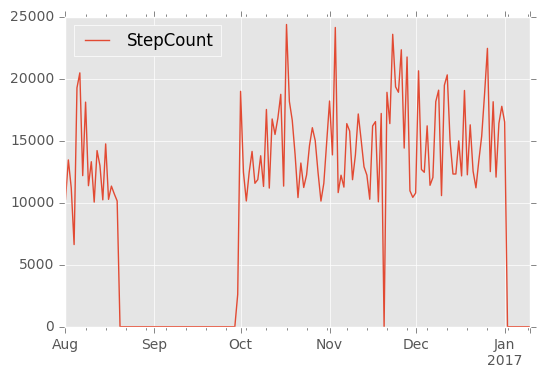

In [16]:
filled_grouped_sampledf.plot()
plt.show()

The goal is to have such a plot for every individual with activity, and cluster them by stepcount.

Using the above method of extracting a single participant's longitudinal activity, I'll write a function that I can use to do this for every participant.

In [17]:
def get_longitudinal(pid, activity_df=wa_df, index=idx):
    this_pid_df = activity_df.loc[activity_df['PID'] == pid]
    this_pid_df['datetime'] = pd.to_datetime(this_pid_df['ActivityDate'])
    
    grouped_pid_df = this_pid_df.groupby(['PID','datetime','Source']).sum()
    grouped_pid_df.reset_index(level=['PID', 'Source'], inplace=True)
    
    filled_grouped_pid_df = grouped_pid_df.reindex(index)
    filled_grouped_pid_df['PID'].fillna(pid, inplace=True)
    filled_grouped_pid_df['Source'].fillna('None', inplace=True)
    filled_grouped_pid_df['StepCount'].fillna(0, inplace=True)
    
    return filled_grouped_pid_df

In [18]:
sofar_df = pd.read_csv(activity_outfile)
sofar = len(sofar_df)
encoded_participants = sofar_df['PID'].tolist()

In [19]:
all_active_participants = wa_df['PID'].unique().tolist()
not_yet_encoded_participants = [x for x in all_active_participants if x not in encoded_participants]

In [20]:
%%time
counter = sofar
with open(activity_outfile, 'a+', newline='') as outfile1:
    writer = csv.writer(outfile1)
    #already wrote headers
#     headers = idx.to_series().tolist()
#     headers.insert(0,'PID')
#     writer.writerow(headers)
    for p in not_yet_encoded_participants:
        p_df = get_longitudinal(p)
        newrow = p_df['StepCount'].tolist()
        newrow.insert(0,p_df['PID'].unique()[0])
        writer.writerow(newrow)
        outfile1.flush()
        counter += 1
        if counter %100 == 0:
            print(str(counter) + ' out of 242,146 participants encoded.')
print('All done!')

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


700 out of 242,146 participants encoded.
800 out of 242,146 participants encoded.
900 out of 242,146 participants encoded.
1000 out of 242,146 participants encoded.
1100 out of 242,146 participants encoded.
1200 out of 242,146 participants encoded.
1300 out of 242,146 participants encoded.
1400 out of 242,146 participants encoded.
1500 out of 242,146 participants encoded.
1600 out of 242,146 participants encoded.
1700 out of 242,146 participants encoded.
1800 out of 242,146 participants encoded.
1900 out of 242,146 participants encoded.
2000 out of 242,146 participants encoded.
2100 out of 242,146 participants encoded.
2200 out of 242,146 participants encoded.
2300 out of 242,146 participants encoded.
2400 out of 242,146 participants encoded.
2500 out of 242,146 participants encoded.
2600 out of 242,146 participants encoded.
2700 out of 242,146 participants encoded.
2800 out of 242,146 participants encoded.
2900 out of 242,146 participants encoded.
3000 out of 242,146 participants enco